In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read file and get column to array
p = pd.read_csv("C:/Users/JOHN WARUTUMO/Desktop/data_analysis/scholarship_us.csv")
colname = "scholarship"
n = np.array(p[colname])

In [4]:
num = n.size

In [6]:
#calibrate frequency axis to extend to 2*pi radians.
f = np.linspace(0,(2*np.pi),num)
#perform fourier transform
ff = np.fft.fft(n-n.mean())

C:\Specialfolder\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

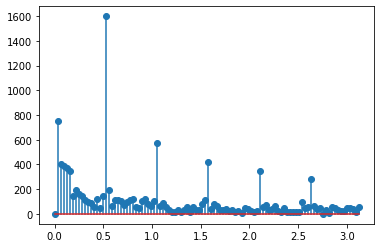

In [8]:
b=num//2
plt.stem(f[:b],np.abs(ff)[:b])#visualize

In [17]:
#I'm amazed by the absurd regularity of the frequencies. 
#There's one prominent frequency at around 0.5 rads per month. Other 5 frequencies are prominent. 
#(Those with values greater than 200 but near the origin may not be regarded as prominent since they don't stand out)

#find out the time periods of the first 3 prominencies
ind = np.where(abs(ff[:num//2])> 500)#indexes of peaks
a = f[ind]#prominent frequencies
a = a/(2*np.pi)#frequencies in cycles per month
a = 1/a#time periods matching the frequencies
a


array([203.        ,  11.94117647,   5.97058824])

In [20]:
#the periods are 203, 12, and 6 months. During these periods scholarship searches ebb and decline.
#in years these are 17, 1, and 0.5 years respectively
#their respective magnitudes are:
np.abs(ff)[ind]

array([ 752.49039778, 1599.45399425,  571.30464728])

C:\Specialfolder\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

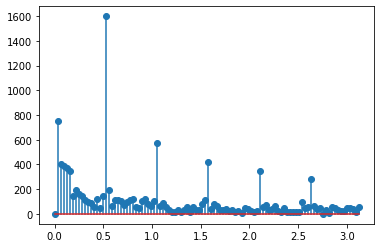

In [21]:
#conclusion... the strongest cycle occurs yearly. 
#other cycles occur after 17 years (extent of sample data) as well as half-yearly
plt.stem(f[:b],np.abs(ff)[:b])#visualize

In [27]:
#how do we examine the other frequencies 
#(which occur much more frequently but are weaker in dominance - I interpret this to mean that their magnitudes are weaker)
ind = np.where(np.abs(ff[:num//2])>200)
ind

(array([ 1,  2,  3,  4,  5, 17, 34, 51, 68, 85], dtype=int64),)

In [45]:
#Observation: the latter peaks are spaced 17 indices away from each other
#we could ignore the first four indices
a = f[ind][[0,5,6,7,8,9]]
a

array([0.03095165, 0.52617808, 1.05235616, 1.57853424, 2.10471232,
       2.6308904 ])

In [48]:
a = a/(2*np.pi)#frequencies in cycles per month
a = 1/a#time periods matching the frequencies
a

array([203.        ,  11.94117647,   5.97058824,   3.98039216,
         2.98529412,   2.38823529])

In [50]:
#204, 12, 6, 4, 3, 2.3 months also have significant contributions
#in years
a = a/12
a

array([1.40972222, 0.08292484, 0.04146242, 0.02764161, 0.02073121,
       0.01658497])

<Figure size 1200x800 with 0 Axes>

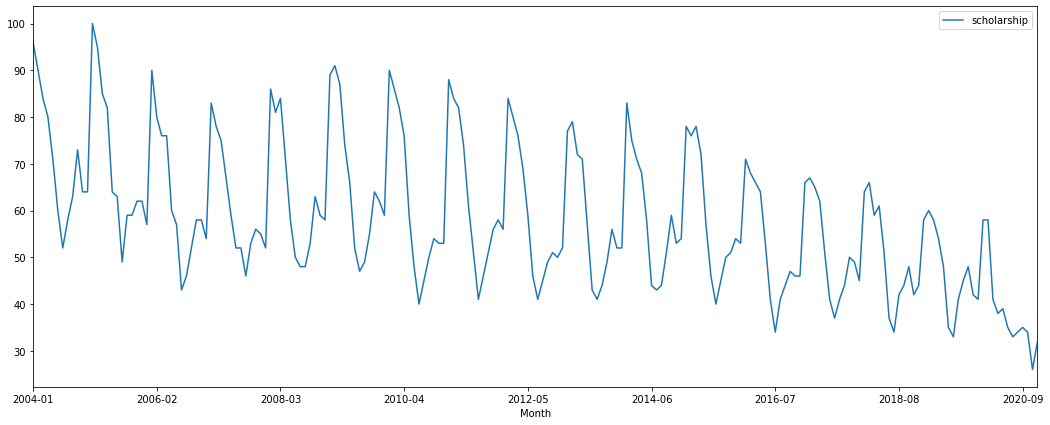

In [63]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [18, 7]
p.index = p['Month']
p.plot()